# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [197]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [203]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [205]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()



In [207]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [209]:
# Change the index to 'linename'
df.set_index('linename', inplace=True)




Reset the index: 

In [143]:
# Reset the index
df.reset_index()




,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...,...
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [213]:
# Add a new 'num_lines' column
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Create a new column 'Num_Lines' that counts the number of unique lines per station
# Assuming 'STATION' is the column that identifies the station and 'LINENAME' contains the line information
df['Num_Lines'] = df['LINENAME'].apply(lambda x: len(set(x.split())))

# Group by station and sum the number of lines
num_lines_df = df.groupby('STATION')['Num_Lines'].max().reset_index()

# Sort the DataFrame by 'Num_Lines' in descending order
sorted_num_lines_df = num_lines_df.sort_values(by='Num_Lines', ascending=False)

# Print the sorted DataFrame
print(sorted_num_lines_df)

             STATION  Num_Lines
0               1 AV          1
246       JACKSON AV          1
255    JUNCTION BLVD          1
254   JOURNAL SQUARE          1
253  JKSN HT-ROOSVLT          1
..               ...        ...
122      ATLANTIC AV          1
121   ATL AV-BARCLAY          1
120  ASTORIA DITMARS          1
119     ASTORIA BLVD          1
372        ZEREGA AV          1

[373 rows x 2 columns]


Write a function to clean column names: 

In [215]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'Num_Lines'],
      dtype='object')

In [217]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.lower()
    return cleaned

In [151]:
# Use the above function to clean the column names
df.columns = [clean(col) for col in df.columns]


In [219]:
# Check to ensure the column names were cleaned
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'Num_Lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [221]:
# Convert the data type of the 'date' column to a date
import pandas as pd

# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Add a new column 'day_of_week' that represents the day of the week
df['day_of_week'] = df['DATE'].dt.dayofweek

# If you want the day of the week as a string (e.g., 'Monday', 'Tuesday', etc.)
df['day_of_week_str'] = df['DATE'].dt.day_name()

# Print the first few rows to verify the changes
print(df[['DATE', 'day_of_week', 'day_of_week_str']].head())





        DATE  day_of_week day_of_week_str
0 2018-08-25            5        Saturday
1 2018-08-25            5        Saturday
2 2018-08-25            5        Saturday
3 2018-08-25            5        Saturday
4 2018-08-25            5        Saturday


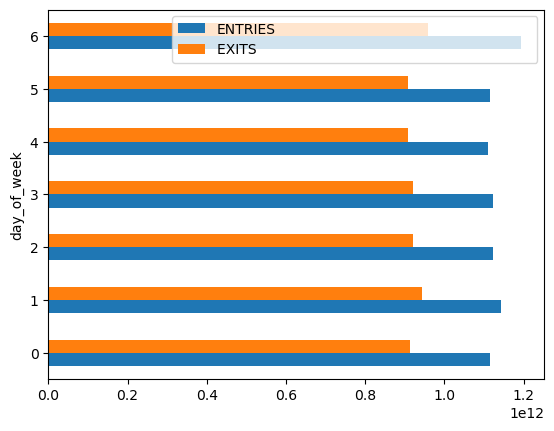

In [105]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [223]:
# Reset the index of grouped
grouped = df.groupby(['STATION', 'day_of_week']).size().reset_index(name='count')
# Print the first five rows of grouped
print(grouped.head())


  STATION  day_of_week  count
0    1 AV            0     60
1    1 AV            1     60
2    1 AV            2     60
3    1 AV            3     60
4    1 AV            4     60


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [229]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

In [231]:
if 'day_of_week' in df.columns:
    # Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
    df['is_weekend'] = df['day_of_week'].map(weekend_map)
else:
    print("The 'day_of_week' column does not exist in the DataFrame.")

# Print the first five rows of the updated DataFrame
print(df.head())

    C/A  UNIT       SCP STATION LINENAME DIVISION       DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-25  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-25  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-25  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-25  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-25  16:00:00   

      DESC  ENTRIES  \
0  REGULAR  6736067   
1  REGULAR  6736087   
2  REGULAR  6736105   
3  REGULAR  6736180   
4  REGULAR  6736349   

   EXITS                                                                 \
0                                            2283184                      
1                                            2283188                      
2                                            2283229                      
3                                            2283314                      
4                                        

In [233]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

KeyError: "None of [Index(['entries', 'exits'], dtype='object')] are in the [columns]"

                  ENTRIES  \
is_weekend                  
False       5614154250681   
True        2307967724596   

            EXITS                                                                 \
is_weekend                                                                         
False                                           4602290732124                      
True                                            1868365831935                      

            day_of_week  
is_weekend               
False            282923  
True             307321  


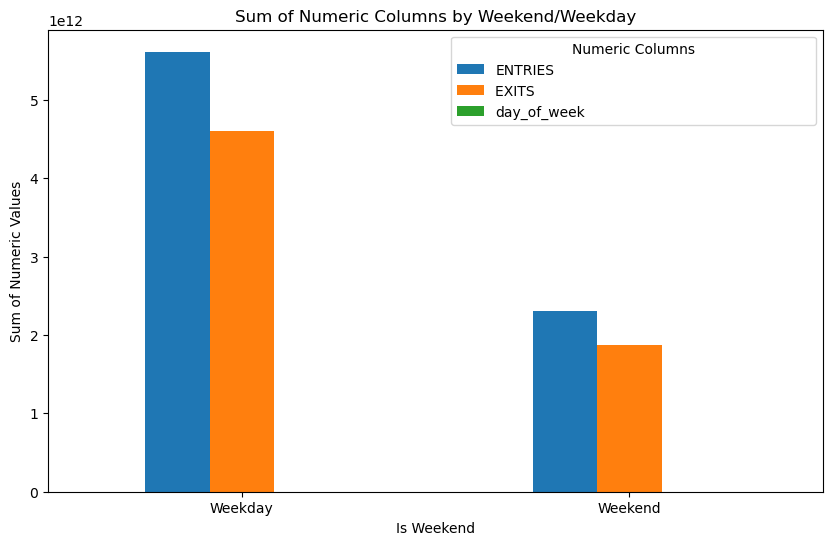

In [235]:
grouped = df.groupby('is_weekend').sum(numeric_only=True)

# Print the grouped DataFrame
print(grouped)

# Plot the results
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of Numeric Columns by Weekend/Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Sum of Numeric Values')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.legend(title='Numeric Columns')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [ ]:
# Remove the 'c/a' and 'scp' columns
df = None
df.head(2)

In [237]:
# Remove the 'c/a' and 'scp' columns
columns_to_remove = ['c/a', 'scp']
df.drop(columns=columns_to_remove, inplace=True, errors='ignore')

# Check the DataFrame after removing the columns
print("DataFrame after removing 'c/a' and 'scp':")
print(df.head(2))

DataFrame after removing 'c/a' and 'scp':
    C/A  UNIT       SCP STATION LINENAME DIVISION       DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-25  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-25  04:00:00   

      DESC  ENTRIES  \
0  REGULAR  6736067   
1  REGULAR  6736087   

   EXITS                                                                 \
0                                            2283184                      
1                                            2283188                      

   day_of_week day_of_week_str  is_weekend  
0            5        Saturday        True  
1            5        Saturday        True  


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

# Your answer here 
When analyzing  the charts that compare ridership by day of the week and categorize them as weekend or weekday, some misleading aspects can occur.

## Summary

You practiced your data cleanup skills using Pandas.